In [1]:
! pip install contractions
! pipn install plotly_express

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 7.5 MB/s eta 0:00:00
/bin/bash: line 1: pipn: command not found


In [2]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/LIDCI/5/PROCESAMIENTO DE LENGUAJE NATURAL/SuicTweets (2).csv')
df.head()

,tweet,intention
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1


In [3]:
import contractions
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
stop_words_en = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [4]:
mapper = {
    1: 'SUICIDE',
    0: 'NOT SUICIDE'
}
df['label']=df['intention'].map(mapper)
df.head()

,tweet,intention,label
0,my life is meaningless i just want to end my l...,1,SUICIDE
1,muttering i wanna die to myself daily for a fe...,1,SUICIDE
2,work slave i really feel like my only purpose ...,1,SUICIDE
3,i did something on the 2 of october i overdose...,1,SUICIDE
4,i feel like no one cares i just want to die ma...,1,SUICIDE


In [5]:
mapper = {
    1: 'SUICIDE',
    0: 'NOT SUICIDE'
}
df['label']=df['intention'].map(mapper)
df.head()

,tweet,intention,label
0,my life is meaningless i just want to end my l...,1,SUICIDE
1,muttering i wanna die to myself daily for a fe...,1,SUICIDE
2,work slave i really feel like my only purpose ...,1,SUICIDE
3,i did something on the 2 of october i overdose...,1,SUICIDE
4,i feel like no one cares i just want to die ma...,1,SUICIDE


In [6]:
from tqdm import tqdm
import contractions
tqdm.pandas()

def preprocesamiento_texto(texto):
  #Arreglar texto
  texto = contractions.fix(texto)
  #Hacer texto minusculo
  texto = texto.lower()
  #regex
  texto = re.sub(r'[^a-zA-Z\s]','', texto)
  #Tokenizar
  texto = word_tokenize(texto)
  #Quitar stopwords
  texto = [token for token in texto if token not in stop_words_en]
  #Lemmatizar
  texto = [lemmatizer.lemmatize(word) for word in texto]
  #juntar todo en string
  texto = ' '.join(texto)
  return texto

In [7]:
df['clean_tweet']=df['tweet'].progress_apply(preprocesamiento_texto)
df.head()

100%|██████████| 9119/9119 [00:16<00:00, 551.37it/s] 


,tweet,intention,label,clean_tweet
0,my life is meaningless i just want to end my l...,1,SUICIDE,life meaningless want end life badly life comp...
1,muttering i wanna die to myself daily for a fe...,1,SUICIDE,muttering want die daily month feel worthless ...
2,work slave i really feel like my only purpose ...,1,SUICIDE,work slave really feel like purpose life make ...
3,i did something on the 2 of october i overdose...,1,SUICIDE,something october overdosed felt alone horribl...
4,i feel like no one cares i just want to die ma...,1,SUICIDE,feel like one care want die maybe feel less lo...


In [9]:
X = df['clean_tweet']
y = df['intention']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state =101)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_vectorized = tfidf_vectorizer.fit_transform(X_train)
X_test_vectorized = tfidf_vectorizer.transform(X_test)

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, n_jobs=-1)
model.fit(X_train_vectorized, y_train)
y_pred = model.predict(X_test_vectorized)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [14]:
model.score(X_train_vectorized, y_train)

0.9869967100109667

In [16]:
model.score(X_test_vectorized, y_test)

0.8538011695906432

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1559
           1       0.95      0.70      0.80      1177

    accuracy                           0.85      2736
   macro avg       0.88      0.83      0.84      2736
weighted avg       0.87      0.85      0.85      2736



<Axes: >

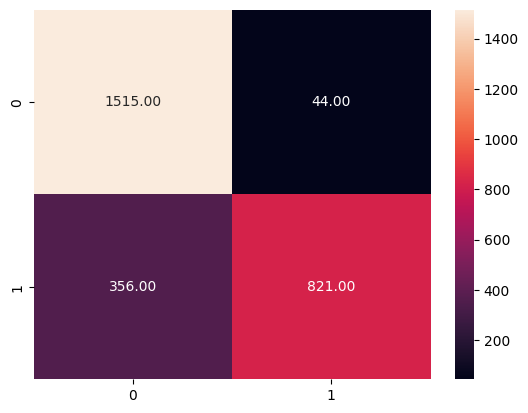

In [18]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='.2f')